In [1]:
import numpy as np

In [4]:
# создаем матрицу А
A = np.array([
    [3, 1],
    [2, 2]
]).T
# вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(A)
print('Собственные числа: \n', eig_values)
print('Собственные векторы: \n', eig_vectors)

Собственные числа: 
 [4. 1.]
Собственные векторы: 
 [[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


In [5]:
# создаем матрицу А
A = np.array([
    [1, -5, -6],
    [4, 8, 7],
    [5, 9, 11]
]).T
# вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(A)
print('Собственные числа: \n', eig_values)
print('Собственные векторы: \n', eig_vectors)

Собственные числа: 
 [13.59373746  5.03209301  1.37416954]
Собственные векторы: 
 [[ 0.45145779  0.83661458  0.10258363]
 [ 0.62348353  0.44632316 -0.77299039]
 [ 0.63832135  0.31760303  0.62606905]]


In [6]:
# создаем матрицу А
A = np.array([
    [1, -4, -5, -6],
    [4, 12, 8, 7],
    [5, 14, 9, 11],
    [8, 15, 7, 4]
]).T
# вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(A)
print('Собственные числа: \n', eig_values)
print('Собственные векторы: \n', eig_vectors)

Собственные числа: 
 [ 2.54687092e+01  1.53129080e+00  1.63252001e-14 -1.00000000e+00]
Собственные векторы: 
 [[-0.33176532 -0.6739195   0.5479715  -0.5312532 ]
 [-0.75622544 -0.67703635  0.72006173 -0.64930947]
 [-0.42446012 -0.00311685 -0.00452869 -0.11805627]
 [-0.37133334  0.2957103  -0.42569687  0.5312532 ]]


Что видим? Одно из собственных чисел получилось равным 0. Это сигнал к тому, что строки или столбцы матрицы A являются линейно зависимыми, то есть матрица плохо обусловлена, а точнее — вырождена.

In [7]:
# создаем матрицу А
A = np.array([
    [0, 1],
    [-1, 0],
]).T
# вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(A)
print('Собственные числа: \n', eig_values)
print('Собственные векторы: \n', eig_vectors)

Собственные числа: 
 [0.+1.j 0.-1.j]
Собственные векторы: 
 [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


In [8]:
from sklearn import datasets 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# загружаем датасет
boston = datasets.load_boston()
#print(boston['DESCR'])
boston_data = pd.DataFrame(
    data=boston.data, #данные
    columns=boston.feature_names #наименования столбцов
)
boston_data['PRICE']=boston.target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Составим матрицу наблюдений, в которую войдут все исходные факторы и вектор целевой переменной: 

In [9]:
A = boston_data.drop('PRICE', axis=1)
y = boston_data[['PRICE']]

Затем составим корреляционную матрицу для исходных факторов:

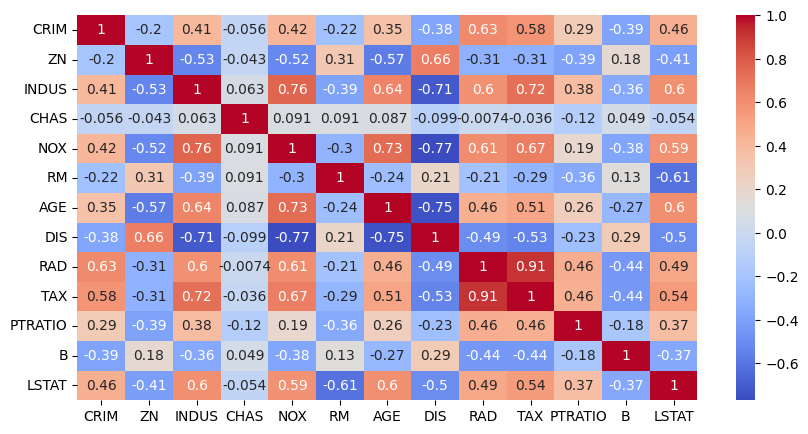

In [10]:
C = A.corr()
fig = plt.figure(figsize=(10, 5))
sns.heatmap(C, annot=True, cmap='coolwarm');

А теперь найдём собственные числа полученной корреляционной матрицы:

In [11]:
# вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(C)
print('Собственные числа: \n', eig_values)
#print('Собственные векторы: \n', eig_vectors)

Собственные числа: 
 [6.12684883 1.43327512 1.24261667 0.85757511 0.83481594 0.65740718
 0.53535609 0.39609731 0.06350926 0.27694333 0.16930298 0.18601437
 0.22023782]


### Так как корреляционная матрица диагональная, то её собственные числа всегда действительны и различны между собой. Это мы и наблюдаем. 

Проверим, что все собственные векторы корреляционной матрицы ортогональны друг другу. Это свойство понадобится нам в методе главных компонент.

Чтобы это проверить, достаточно найти матрицу Грама L^T*L, где L — матрица, составленная из собственных факторов. В результате мы должны будем получить единичную матрицу. 

На её главной диагонали должны быть расположены единицы, а внедиагональные элементы — скалярные произведения собственных векторов — должны быть равны 0. 

In [12]:
# считаем матрицу Грамма L^T*L:
print(np.round(eig_vectors.T @ eig_vectors, 2))

[[ 1. -0.  0.  0.  0.  0. -0. -0. -0.  0.  0.  0.  0.]
 [-0.  1. -0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0.]
 [ 0. -0.  1. -0.  0.  0. -0.  0. -0.  0.  0.  0. -0.]
 [ 0.  0. -0.  1.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
 [ 0.  0.  0.  0.  1. -0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -0.  1.  0.  0. -0. -0.  0.  0.  0.]
 [-0. -0. -0.  0.  0.  0.  1. -0. -0.  0. -0.  0.  0.]
 [-0. -0.  0.  0.  0.  0. -0.  1.  0. -0.  0. -0. -0.]
 [-0. -0. -0.  0.  0. -0. -0.  0.  1. -0. -0. -0.  0.]
 [ 0. -0.  0. -0.  0. -0.  0. -0. -0.  1. -0.  0. -0.]
 [ 0.  0.  0.  0.  0.  0. -0.  0. -0. -0.  1. -0. -0.]
 [ 0.  0.  0. -0.  0.  0.  0. -0. -0.  0. -0.  1. -0.]
 [ 0.  0. -0.  0.  0.  0.  0. -0.  0. -0. -0. -0.  1.]]


⭐️ Та-дам! Мы получили единичную матрицу, а значит, собственные вектора ортогональны друг другу. Мы доказали ещё одно свойство собственных чисел для диагональных матриц.

## Задание 4.1

In [13]:
# создаем матрицу А
A = np.array([
    [1, 3, 5],
    [4, -4, 9],
    [13, 7, 12]
]).T
# вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(A)
print('Собственные числа: \n', eig_values)
print('Собственные векторы: \n', eig_vectors)

Собственные числа: 
 [19.52189628 -3.75422737 -6.76766891]
Собственные векторы: 
 [[-0.59065136 -0.9084069  -0.40394124]
 [-0.29844178 -0.16657961 -0.77823322]
 [-0.74970893  0.38346857  0.48081652]]


## Задание 4.2

In [18]:
# создаем матрицу А
A = np.array([
    [1, 9, 4],
    [9, 4, 7],
    [4, 7, 12]
]).T
# вычисляем собственные числа и собственные векторы
eig_values, eig_vectors = np.linalg.eig(A.T@A)
print('Собственные числа: \n', np.round(eig_values, 0))

Собственные числа: 
 [391.  46.  16.]


## Задание 6.5-3

In [19]:
import numpy as np
x1 = np.array([1, 2, 1, 1]).T
x2 = np.array([70, 130, 65, 60]).T

C = np.array([
[1, 0.9922],
[0.9922, 1],
])

eig_values, eig_vectors = np.linalg.eig(C)

x1_norm = (x1 - x1.mean()) / np.linalg.norm(x1)
x2_norm = (x2 - x2.mean()) / np.linalg.norm(x2)

x_new = x1_norm * eig_vectors[0][0] + x2_norm * eig_vectors[1][0]

x_new_norm = (x_new - x_new.mean()) / np.linalg.norm(x_new)

print(np.round(x_new_norm, 2))

[-0.24  0.86 -0.29 -0.33]
